In [1]:
import numpy as np 
import pandas as pd
import datetime
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras import models, layers

# keras é uma API de aprendizado de máquina escrita em Python, executada na plataforma de aprendizado de máquina TensorFlow
# scikit-learn (sklearn) é uma biblioteca de aprendizado de máquina de código aberto

C:\Users\nowadzki\.conda\envs\tensorflow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('bitcoin.csv')
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [3]:
# o agrupamento das variáveis a serem treinadas serão baseadas nos valores de preço ponderado (Weighted_Price) para 30 dias

prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

In [4]:
# pré-processamento dos dados

training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [5]:
# importando as bibliotecas e pacotes Keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# inicializando o RNN
regressor = Sequential()

# adicionando a camada de entrada e a camada LSTM
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# adicionando a camada de saída
regressor.add(Dense(units = 1))

# compilando o RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# ajustando o RNN ao conjunto de treinamento
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
669/669 [==============================] - 2s 1ms/step - loss: 0.0258
Epoch 2/100
669/669 [==============================] - 1s 1ms/step - loss: 0.0112
Epoch 3/100
669/669 [==============================] - 1s 1ms/step - loss: 0.0095
Epoch 4/100
669/669 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 5/100
669/669 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 6/100
669/669 [==============================] - 1s 1ms/step - loss: 0.0029
Epoch 7/100
669/669 [==============================] - 1s 1ms/step - loss: 0.0013
Epoch 8/100
669/669 [==============================] - 1s 1ms/step - loss: 5.0560e-04
Epoch 9/100
669/669 [==============================] - 1s 1ms/step - loss: 2.7092e-04
Epoch 10/100
669/669 [==============================] - 1s 1ms/step - loss: 2.1961e-04
Epoch 11/100
669/669 [==============================] - 1s 1ms/step - loss: 1.9571e-04
Epoch 12/100
669/669 [==============================] - 1s 1ms/step - loss: 1.72

669/669 [==============================] - 1s 1ms/step - loss: 3.8705e-05
Epoch 96/100
669/669 [==============================] - 1s 1ms/step - loss: 3.8653e-05
Epoch 97/100
669/669 [==============================] - 1s 1ms/step - loss: 3.9727e-05
Epoch 98/100
669/669 [==============================] - 1s 1ms/step - loss: 4.1155e-05
Epoch 99/100
669/669 [==============================] - 1s 1ms/step - loss: 3.8358e-05
Epoch 100/100
669/669 [==============================] - 1s 1ms/step - loss: 4.0318e-05


In [6]:
# fazendo as previsões

test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

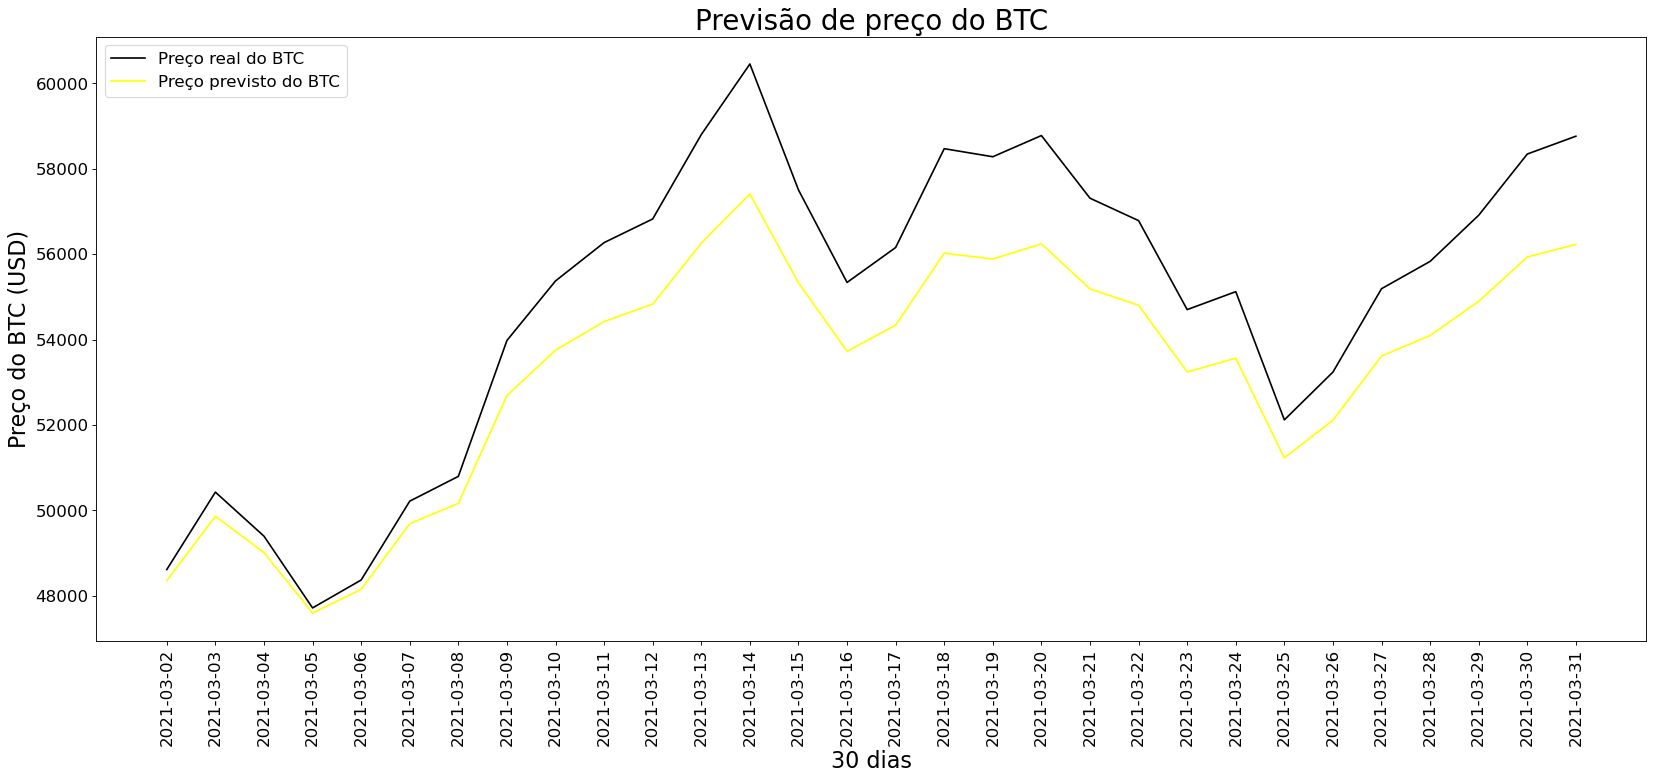

In [7]:
# visualizando os resultados

plt.figure(figsize=(25,10), dpi=80, facecolor='w', edgecolor='black')
ax = plt.gca()  
plt.plot(test_set, color = 'black', label = 'Preço real do BTC')
plt.plot(predicted_BTC_price, color = 'yellow', label = 'Preço previsto do BTC')
plt.title('Previsão de preço do BTC', fontsize=25)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
plt.xlabel('30 dias', fontsize=20)
plt.ylabel('Preço do BTC (USD)', fontsize=20)
plt.legend(loc=2, prop={'size': 15})
plt.show()

In [8]:
# rede de memória de longo prazo

df = pd.read_csv("bitcoin.csv")
df['price'] = (df['High']+ df['Low'])/2
df.drop(['Open','Close','Volume_(BTC)','Volume_(Currency)', 'Weighted_Price','High','Low'],axis=1, inplace=True)

df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit='s')
df = df.set_index('Timestamp')
df = df.resample('6H').mean()
df = df.dropna()

df.head()

,price
Timestamp,
2011-12-31 06:00:00,4.390000
2011-12-31 12:00:00,4.501667
2012-01-01 00:00:00,4.580000
2012-01-01 12:00:00,4.840000
2012-01-01 18:00:00,5.000000


In [9]:
# ao usar MinMaxScaler, a faixa de preço é (0 ~ 1) agora.

scaler = MinMaxScaler()
price = scaler.fit_transform(np.array(df['price']).reshape(-1,1))
df['price'] = price

In [10]:
# sliding window e split train, dados de teste
# prevemos 1 dado usando 50 dados


X_l = []
y_l = []
N = len(df)
D = 50
for i in range(N-D-1):
    X_l.append(df.iloc[i:i+D])
    y_l.append(df.iloc[i+D])
    
X = np.array(X_l)
y = np.array(y_l)

print(X.shape, y.shape)

(13325, 50, 1) (13325, 1)


In [11]:
# após a janela deslizante, dividimos os dados em X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 100)

In [12]:
# processo do modelo LSTM

m_x = layers.Input(shape = X_train.shape[1:])
m_h = layers.LSTM(10)(m_x)
m_y = layers.Dense(1)(m_h)
m = models.Model(m_x,m_y)
m.compile('adam','mse')
m.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                480       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [13]:
# ajuste e avaliação do modelo

history = m.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test),verbose=0)

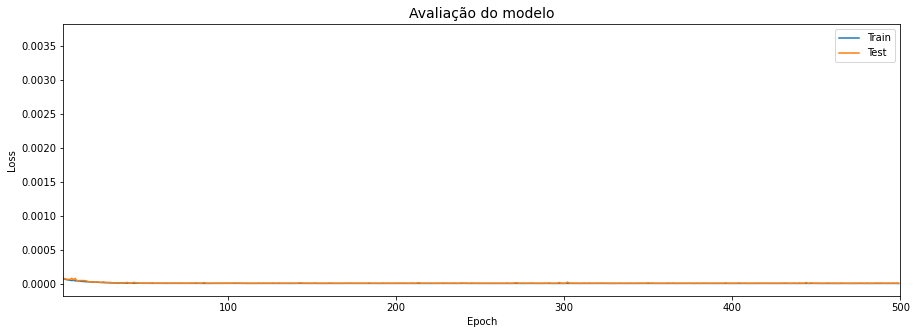

In [14]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Test'])
plt.title("Avaliação do modelo", fontsize=14)
plt.xlabel('Epoch')
plt.xlim(2,500)
plt.ylabel('Loss')
plt.show()

In [15]:
# previsão de preço, previsão de 300 dados

pred = []

pr = m.predict(np.array(df[-50:]))

pred.append(pr[0])

for i in range(1,50):
    pr = m.predict(np.concatenate((np.array(df[-50+i:]), pred[:]), axis=0))
    pred.append(pr[0])

for i in range(0,250):
    pr = m.predict(np.concatenate(pred[i:],axis=0).reshape(-1,1))
    pred.append(pr[0])

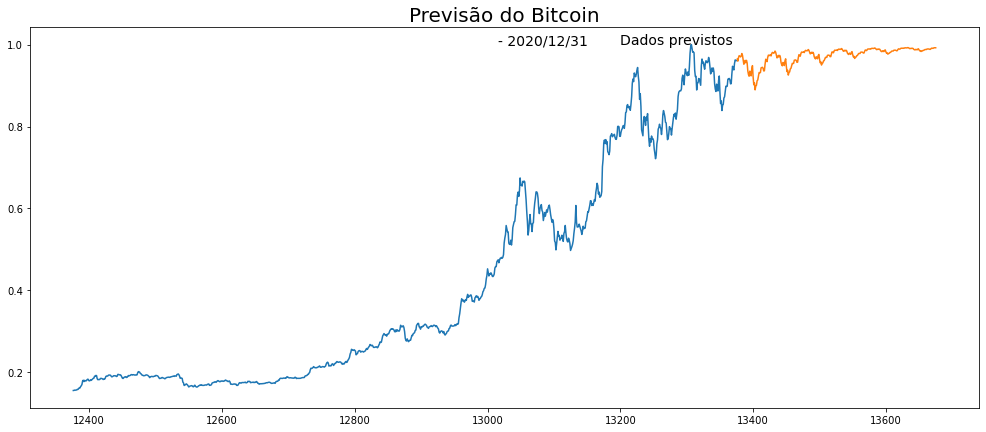

In [16]:
pred = pd.DataFrame(pred)

pred = pred.reset_index()

pred.columns = ['z','price']

pred.drop(['z'],axis=1,inplace=True)

data = pd.concat([df.reset_index().drop('Timestamp',axis=1),pred],ignore_index=True)

plt.figure(figsize=(17,7))
plt.plot(data[-1300:-300])
plt.title("Previsão do Bitcoin",fontsize=20)
plt.text(13200,1,"Dados previstos",fontsize=14)
plt.text(13015,1,"- 2020/12/31",fontsize=14)
plt.plot(data[-300:])
plt.show()

# o LSTM é um importante algoritmo de deeplearning 
# porém não pode prever o preço do Bitcoin que nunca teve um aumento tão significativo anteriormente
